The data given is of US patients who diagnosed as Covid positive, many of them recovered, some died.
The data consist of different province of US, we need to check out whether the patient was Covid Confirmed case or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
cr=pd.read_csv('US_covid.csv', parse_dates=['Last_Update'])
cr.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [3]:
cr.columns

Index(['Province_State', 'Country_Region', 'Last_Update', 'Lat', 'Long_',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'FIPS', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate'],
      dtype='object')

In [4]:
cr.dtypes

Province_State                  object
Country_Region                  object
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                            object
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [5]:
cr.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

As we can clearly see that data has null values,and they are average
null values which means they can be replaced either by mode or the mean function, 
and the columns which has low number of null values can be dropped.

In [6]:
cr['People_Hospitalized']=cr['People_Hospitalized'].fillna(cr['People_Hospitalized'].mode()[0])
cr['Recovered']=cr['Recovered'].fillna(cr['Recovered'].mode()[0])
cr['Hospitalization_Rate']=cr['Hospitalization_Rate'].fillna(cr['Hospitalization_Rate'].mode()[0])

In [7]:
cr.dropna(inplace=True)

In [8]:
cr.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

We can see some columns have categorical data we need to convert it into the numerical data by using label encoder.

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cr['Province_State']=le.fit_transform(cr['Province_State'])
cr['Country_Region']=le.fit_transform(cr['Country_Region'])
cr['ISO3']=le.fit_transform(cr['ISO3'])

In [10]:
cr.dtypes 

Province_State                   int32
Country_Region                   int32
Last_Update             datetime64[ns]
Lat                            float64
Long_                          float64
Confirmed                        int64
Deaths                           int64
Recovered                      float64
Active                         float64
FIPS                             int64
Incident_Rate                  float64
People_Tested                  float64
People_Hospitalized            float64
Mortality_Rate                 float64
UID                              int64
ISO3                             int32
Testing_Rate                   float64
Hospitalization_Rate           float64
dtype: object

In [11]:
cr_dates=pd.DataFrame()
cr_dates['Day']=cr['Last_Update'].dt.day_name()
cr_dates['Month']=cr['Last_Update'].dt.month_name()
cr_dates['Type of Day']=np.where((cr_dates['Day']=='Saturday')|(cr_dates['Day']=='Sunday'),'weekend', 'weekday')
cr_dates.head(10)

,Day,Month,Type of Day
0,Thursday,May,weekday
1,Thursday,May,weekday
3,Thursday,May,weekday
4,Thursday,May,weekday
5,Thursday,May,weekday
6,Thursday,May,weekday
7,Thursday,May,weekday
8,Thursday,May,weekday
10,Thursday,May,weekday
11,Thursday,May,weekday


In [12]:
(cr_dates['Month']== 'Jan').sum()

0

In [13]:
(cr_dates['Day']== 'Sunday').sum()

0

It seems the data consists of just Thursday of May month and considers different province 
which had the Covid related cases and deaths on the Thursday of May month, which also means that we can drop the column of Last Update data as it as no specific use as such.

In [14]:
cm=cr.drop('Last_Update', axis=1)

In [15]:
cm.head()

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,32.3182,-86.9023,13052,522,13.0,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,3,3353.942386,11.438860
1,1,0,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,65.0,2.493766,84000002,3,5063.940017,6.778043
3,2,0,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,3,2272.859351,12.022005
4,3,0,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,3,3189.670370,10.693584
5,4,0,36.1162,-119.6816,85997,3497,13.0,82500.0,6,217.646575,1380120.0,65.0,4.066421,84000006,3,3492.893832,6.778043


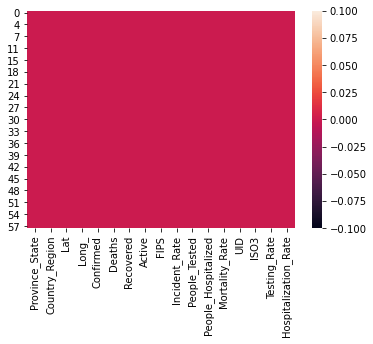

In [16]:
sns.heatmap(cm.isnull())

In [17]:
cm.corr()

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,NaN,0.028758,0.035615,-0.032548,-0.015341,0.105567,-0.066463,0.864537,-0.116961,-0.091367,-0.005920,-0.045473,-0.127902,0.084633,0.029655,-0.130724
Country_Region,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lat,0.028758,NaN,1.000000,-0.570065,0.098689,0.110710,0.056641,0.100299,-0.331101,0.210072,0.024969,0.071905,-0.189675,0.718638,0.499876,0.194446,0.054289
Long_,0.035615,NaN,-0.570065,1.000000,-0.006640,0.016533,-0.023586,-0.004159,0.433423,0.010608,-0.105068,0.026238,0.318569,-0.714161,-0.834567,0.138546,-0.109053
Confirmed,-0.032548,NaN,0.098689,-0.006640,1.000000,0.982353,0.753625,0.985028,-0.091928,0.710461,0.827191,0.847261,0.375722,0.144630,0.091684,0.327662,0.193453
Deaths,-0.015341,NaN,0.110710,0.016533,0.982353,1.000000,0.780289,0.954112,-0.061217,0.712258,0.741134,0.888857,0.427860,0.112576,0.071355,0.343456,0.218532
Recovered,0.105567,NaN,0.056641,-0.023586,0.753625,0.780289,1.000000,0.629615,0.026689,0.517888,0.595173,0.688354,0.296030,0.141278,0.088881,0.262106,0.103518
Active,-0.066463,NaN,0.100299,-0.004159,0.985028,0.954112,0.629615,1.000000,-0.117599,0.702805,0.829018,0.816412,0.361037,0.137263,0.087188,0.316773,0.198355
FIPS,0.864537,NaN,-0.331101,0.433423,-0.091928,-0.061217,0.026689,-0.117599,1.000000,-0.199669,-0.178254,-0.038475,0.057172,-0.587075,-0.320960,-0.044428,-0.222269
Incident_Rate,-0.116961,NaN,0.210072,0.010608,0.710461,0.712258,0.517888,0.702805,-0.199669,1.000000,0.434094,0.535499,0.373338,0.231567,0.144087,0.612139,0.124990


In [18]:
cm.describe()

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,55.00000,55.0,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,5.500000e+01,55.000000,55.000000,5.500000e+01,55.000000,55.000000,55.000000
mean,27.00000,0.0,37.769382,-83.662516,28212.745455,1698.836364,5354.200000,21162.781818,32.036364,403.435002,2.299576e+05,2964.472727,4.567409,7.789098e+07,2.909091,3960.938317,11.316742
std,16.02082,0.0,8.453768,48.840127,53614.101223,4178.550115,10605.470942,42148.607793,18.878720,402.735419,2.999399e+05,10427.705093,2.074273,2.201472e+07,0.518999,1884.729897,5.393011
min,0.00000,0.0,13.444300,-157.498300,21.000000,2.000000,13.000000,2.000000,1.000000,38.082112,1.383000e+03,65.000000,1.101269,3.160000e+02,0.000000,97.702058,6.778043
25%,13.50000,0.0,34.905100,-99.611400,3834.500000,98.500000,37.000000,1076.000000,17.500000,158.533760,4.859600e+04,65.000000,3.256718,8.400001e+07,3.000000,2752.080259,6.778043
50%,27.00000,0.0,39.063900,-86.902300,11528.000000,407.000000,1275.000000,6324.000000,31.000000,251.824349,1.422460e+05,231.000000,4.415327,8.400003e+07,3.000000,3492.893832,8.933819
75%,40.50000,0.0,42.493100,-76.914450,31172.000000,1561.500000,4473.000000,19810.500000,45.500000,483.617754,2.817865e+05,1846.500000,5.508969,8.400004e+07,3.000000,4863.746497,15.811886
max,54.00000,0.0,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,78.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.400006e+07,4.000000,11377.424693,28.054438


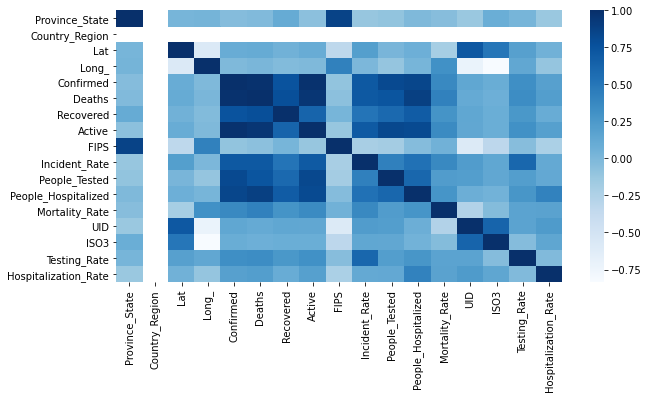

In [19]:
plt.figure(figsize=(10,5))
sns.heatmap(cm.corr(), cmap='Blues')

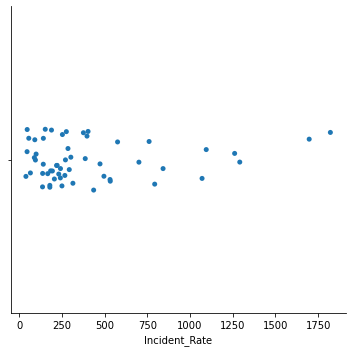

In [20]:
sns.catplot(x='Incident_Rate', data=cm)

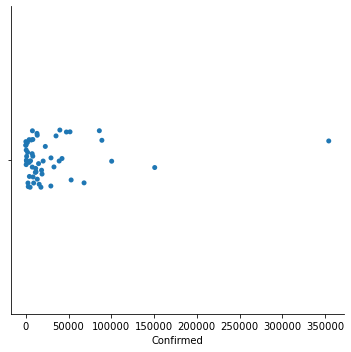

In [21]:
sns.catplot(x='Confirmed', data=cm)

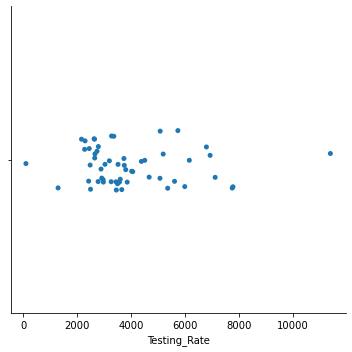

In [22]:
sns.catplot(x='Testing_Rate', data=cm)

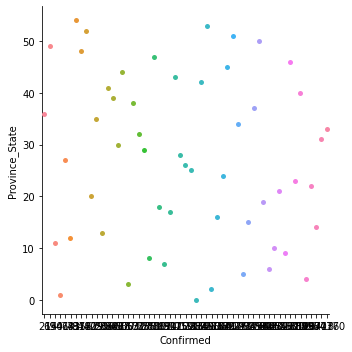

In [23]:
sns.catplot(x='Confirmed', y='Province_State', data=cm)

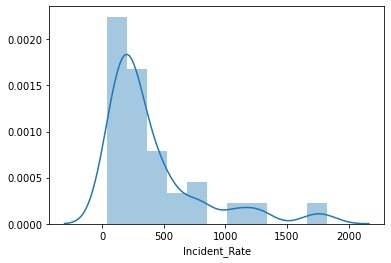

In [24]:
sns.distplot(cm['Incident_Rate'])

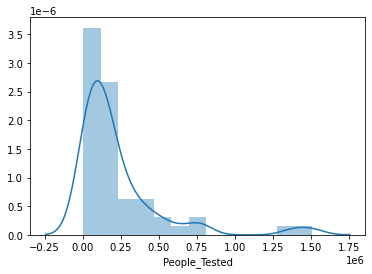

In [25]:
sns.distplot(cm['People_Tested'])

In [26]:
cm.skew()

Province_State          0.000000
Country_Region          0.000000
Lat                    -0.914268
Long_                   3.783868
Confirmed               4.614978
Deaths                  5.361075
Recovered               3.556946
Active                  4.083998
FIPS                    0.370416
Incident_Rate           1.955029
People_Tested           2.769517
People_Hospitalized     6.720463
Mortality_Rate          0.591921
UID                    -3.383648
ISO3                   -4.260285
Testing_Rate            1.452496
Hospitalization_Rate    1.082989
dtype: float64

(array([ 2., 16., 34.,  1.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([-157.4983 , -127.18108,  -96.86386,  -66.54664,  -36.22942,
          -5.9122 ,   24.40502,   54.72224,   85.03946,  115.35668,
         145.6739 ]),
 <a list of 10 Patch objects>)

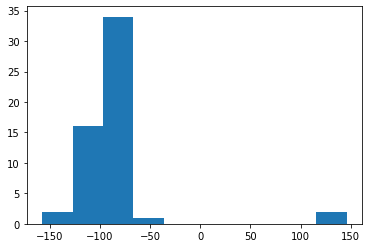

In [27]:
plt.hist(cm['Long_'], bins=10)

(array([43.,  7.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([2.100000e+01, 3.545590e+04, 7.089080e+04, 1.063257e+05,
        1.417606e+05, 1.771955e+05, 2.126304e+05, 2.480653e+05,
        2.835002e+05, 3.189351e+05, 3.543700e+05]),
 <a list of 10 Patch objects>)

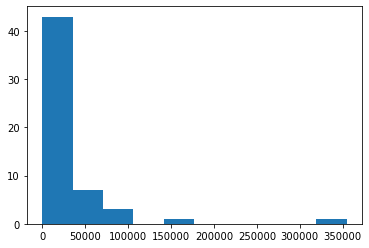

In [28]:
plt.hist(cm['Confirmed'], bins=10)

(array([6., 7., 8., 7., 8., 7., 6., 2., 2., 2.]),
 array([ 1. ,  8.7, 16.4, 24.1, 31.8, 39.5, 47.2, 54.9, 62.6, 70.3, 78. ]),
 <a list of 10 Patch objects>)

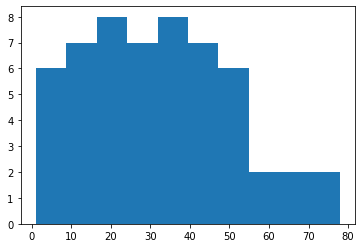

In [29]:
plt.hist(cm['FIPS'], bins=10)

(array([47.,  5.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.00000e+00, 2.86540e+03, 5.72880e+03, 8.59220e+03, 1.14556e+04,
        1.43190e+04, 1.71824e+04, 2.00458e+04, 2.29092e+04, 2.57726e+04,
        2.86360e+04]),
 <a list of 10 Patch objects>)

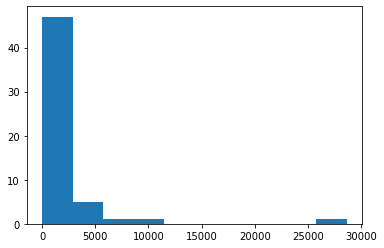

In [30]:
plt.hist(cm['Deaths'], bins=10)

In [31]:
cm.skew()

Province_State          0.000000
Country_Region          0.000000
Lat                    -0.914268
Long_                   3.783868
Confirmed               4.614978
Deaths                  5.361075
Recovered               3.556946
Active                  4.083998
FIPS                    0.370416
Incident_Rate           1.955029
People_Tested           2.769517
People_Hospitalized     6.720463
Mortality_Rate          0.591921
UID                    -3.383648
ISO3                   -4.260285
Testing_Rate            1.452496
Hospitalization_Rate    1.082989
dtype: float64

In [32]:
cs=cm.copy()

In [33]:
cs['Confirmed']=np.log1p(cs['Confirmed'])
cs['Deaths']=np.log1p(cs['Deaths'])
cs['Recovered']=np.log1p(cs['Recovered'])
cs['Active']=np.log1p(cs['Active'])
cs['Incident_Rate']=np.log1p(cs['Incident_Rate'])
cs['People_Tested']=np.log1p(cs['People_Tested'])
cs['People_Hospitalized']=np.log1p(cs['People_Hospitalized'])
cs['Testing_Rate']=(cs['Testing_Rate']/20)**10
cs['Hospitalization_Rate']=(cs['Hospitalization_Rate']/20)**10
cs['ISO3']=(cs['ISO3']/20)**10

In [34]:
from scipy.stats import boxcox
cs['Testing_Rate']=boxcox(cs['Testing_Rate'],0)
cs['Hospitalization_Rate']=boxcox(cs['Hospitalization_Rate'],0)

In [35]:
cs.skew()

Province_State          0.000000
Country_Region          0.000000
Lat                    -0.914268
Long_                   3.783868
Confirmed              -0.929534
Deaths                 -0.343052
Recovered              -0.394539
Active                 -1.014573
FIPS                    0.370416
Incident_Rate           0.022996
People_Tested          -0.943518
People_Hospitalized     0.610036
Mortality_Rate          0.591921
UID                    -3.383648
ISO3                    0.000000
Testing_Rate           -3.233234
Hospitalization_Rate    0.547737
dtype: float64

Now,after removing most of the skewed values we need to remove the outliers from the data,
if any we can check the outliers from the boxplot method and if any we can remove from the zcore method 

{'whiskers': [<matplotlib.lines.Line2D at 0xd2f5bb0>,
 'caps': [<matplotlib.lines.Line2D at 0xd3002b0>,
 'boxes': [<matplotlib.lines.Line2D at 0xd2f5850>],
 'medians': [<matplotlib.lines.Line2D at 0xd300970>],
 'fliers': [<matplotlib.lines.Line2D at 0xd300c70>],
 'means': []}

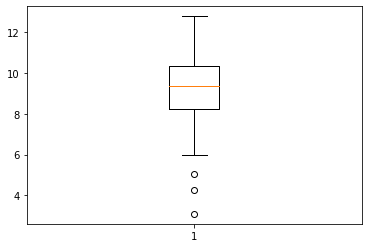

In [36]:
plt.boxplot(cs['Confirmed'])

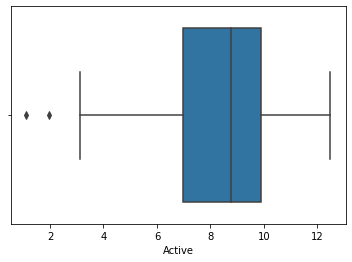

In [37]:
sns.boxplot(cs['Active'])

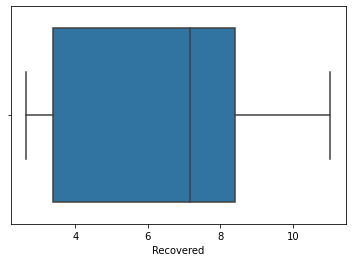

In [38]:
sns.boxplot(cs['Recovered'])

In [39]:
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import zscore
z=np.abs(zscore(cs))
ca=cs[(z<3)]
ca

,Province_State,Country_Region,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,32.3182,-86.9023,9.476773,6.259581,2.639057,9.435961,1,5.587976,12.010368,7.309212,3.999387,84000001,5.766504e-09,51.221595,-5.587159
0,0,0,32.3182,-86.9023,9.476773,6.259581,2.639057,9.435961,1,5.587976,12.010368,7.309212,3.999387,84000001,5.766504e-09,51.221595,-5.587159
0,0,0,32.3182,-86.9023,9.476773,6.259581,2.639057,9.435961,1,5.587976,12.010368,7.309212,3.999387,84000001,5.766504e-09,51.221595,-5.587159
0,0,0,32.3182,-86.9023,9.476773,6.259581,2.639057,9.435961,1,5.587976,12.010368,7.309212,3.999387,84000001,5.766504e-09,51.221595,-5.587159
0,0,0,32.3182,-86.9023,9.476773,6.259581,2.639057,9.435961,1,5.587976,12.010368,7.309212,3.999387,84000001,5.766504e-09,51.221595,-5.587159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,54,0,42.7560,-107.3025,6.669498,2.484907,6.270988,5.517453,56,4.919839,9.843791,4.317488,1.397713,84000056,5.766504e-09,50.922893,-7.547252
57,54,0,42.7560,-107.3025,6.669498,2.484907,6.270988,5.517453,56,4.919839,9.843791,4.317488,1.397713,84000056,5.766504e-09,50.922893,-7.547252
57,54,0,42.7560,-107.3025,6.669498,2.484907,6.270988,5.517453,56,4.919839,9.843791,4.317488,1.397713,84000056,5.766504e-09,50.922893,-7.547252
57,54,0,42.7560,-107.3025,6.669498,2.484907,6.270988,5.517453,56,4.919839,9.843791,4.317488,1.397713,84000056,5.766504e-09,50.922893,-7.547252


In [40]:
ci=ca.drop(['UID', 'ISO3'], axis=1)

In [41]:
x=ci.drop('Confirmed', axis=1)
y=ci.iloc[:,4]

In [42]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)
x


array([[-1.69473647,  0.        , -0.70341898, ..., -0.26599238,
        -0.07303106,  0.24217268],
       [-1.69473647,  0.        , -0.70341898, ..., -0.26599238,
        -0.07303106,  0.24217268],
       [-1.69473647,  0.        , -0.70341898, ..., -0.26599238,
        -0.07303106,  0.24217268],
       ...,
       [ 1.7076275 ,  0.        ,  0.58530304, ..., -1.54703407,
        -0.12267902, -0.21077545],
       [ 1.7076275 ,  0.        ,  0.58530304, ..., -1.54703407,
        -0.12267902, -0.21077545],
       [ 1.7076275 ,  0.        ,  0.58530304, ..., -1.54703407,
        -0.12267902, -0.21077545]])

In [43]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
x=pca.fit_transform(x)
x


array([[-1.01881407,  0.38708867,  2.61650681, ...,  0.44049238,
        -0.61247615,  0.62970305],
       [-1.01881407,  0.38708867,  2.61650681, ...,  0.44049238,
        -0.61247615,  0.62970305],
       [-1.01881407,  0.38708867,  2.61650681, ...,  0.44049238,
        -0.61247615,  0.62970305],
       ...,
       [ 2.99028516,  1.14217519, -1.70026128, ...,  0.229005  ,
        -0.73479523,  0.2752947 ],
       [ 2.99028516,  1.14217519, -1.70026128, ...,  0.229005  ,
        -0.73479523,  0.2752947 ],
       [ 2.99028516,  1.14217519, -1.70026128, ...,  0.229005  ,
        -0.73479523,  0.2752947 ]])

We can now see that we can make the model in several ways, either by keeping the Confirmed numbers as target, 
or the recovered or the deaths as the target,
so we will try to make model of confirmed first and then even try to make the model with recovered as the target variable.
we will use the linear regression and then accoridngly we go with the lasso and ridge regression to undetstand the results and get better score comparitively.

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for r_state in range(42,101):
    x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=r_state, test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=r_state
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 68 to the r2 Score is 0.9929646988327568


In [45]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=68, test_size=0.20)
ln=LinearRegression()
ln.fit(x_train,y_train)
y_pred=ln.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
r2_scr

0.9929646988327568

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(ln,x,y,scoring='r2', cv=5).mean()
cross_val_scr

0.9868297977348656

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge
alpha_value={'alpha':[1,0.1,0.01,0.001]}
model=Ridge(),Lasso()
for m in model:
    grid=GridSearchCV(estimator=m, param_grid=alpha_value, cv=5)
    grid.fit(x,y)
    print(grid.best_params_)
    print(grid.best_score_)

{'alpha': 0.001}
0.9868297850001294
{'alpha': 0.001}
0.9867476661180131


In [48]:
rg=Ridge(alpha=0.001)
rg.fit(x_train,y_train)
rg.score(x_train,y_train)
pred_y=rg.predict(x_test)
r2_scrrg=r2_score(y_test,pred_y)
print('r2 score',r2_scrrg)
print(mean_squared_error(y_test,pred_y))

r2 score 0.9929648153699907
0.02556551613213116


In [49]:
ls=Lasso(alpha=0.001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_y=ls.predict(x_test)
r2_scrrg=r2_score(y_test,pred_y)
print('r2 score',r2_scrrg)
print(mean_squared_error(y_test,pred_y))

r2 score 0.9929762105230465
0.025524106704433287


We will also try for recover prediction model

In [50]:
x_n=ci.drop('Recovered', axis=1)
y_n=ci.iloc[:,6]

In [51]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x_n=sd.fit_transform(x_n)
x_n


array([[-1.69473647,  0.        , -0.70341898, ..., -0.26599238,
        -0.07303106,  0.24217268],
       [-1.69473647,  0.        , -0.70341898, ..., -0.26599238,
        -0.07303106,  0.24217268],
       [-1.69473647,  0.        , -0.70341898, ..., -0.26599238,
        -0.07303106,  0.24217268],
       ...,
       [ 1.7076275 ,  0.        ,  0.58530304, ..., -1.54703407,
        -0.12267902, -0.21077545],
       [ 1.7076275 ,  0.        ,  0.58530304, ..., -1.54703407,
        -0.12267902, -0.21077545],
       [ 1.7076275 ,  0.        ,  0.58530304, ..., -1.54703407,
        -0.12267902, -0.21077545]])

In [52]:
from sklearn.decomposition import PCA
pca=PCA(n_components=7)
x_n=pca.fit_transform(x_n)
x_n

array([[-1.1079946 ,  0.86309552, -1.89136041, ...,  0.58129342,
         0.61602629,  0.11878835],
       [-1.1079946 ,  0.86309552, -1.89136041, ...,  0.58129342,
         0.61602629,  0.11878835],
       [-1.1079946 ,  0.86309552, -1.89136041, ...,  0.58129342,
         0.61602629,  0.11878835],
       ...,
       [ 3.28653663,  0.81732586,  1.427721  , ..., -0.58539184,
         0.30081426, -0.38434337],
       [ 3.28653663,  0.81732586,  1.427721  , ..., -0.58539184,
         0.30081426, -0.38434337],
       [ 3.28653663,  0.81732586,  1.427721  , ..., -0.58539184,
         0.30081426, -0.38434337]])

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
max_scr=0
for r_state in range(42,101):
    x_n_test,x_n_train,y_n_test,y_n_train=train_test_split(x_n,y_n,random_state=r_state, test_size=0.20)
    lr=LinearRegression()
    lr.fit(x_n_train,y_n_train)
    y_pred=lr.predict(x_n_test)
    r2_scr=r2_score(y_n_test,y_pred)
    if r2_scr>max_scr:
        max_scr=r2_scr
        final_rstate=r_state
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 53 to the r2 Score is 0.11721625075187425


It seems the selection of confirmed cases as target variable showed better results, so going with that we wouldd save the model.

In [55]:
df1=pd.DataFrame(y_pred)
df1.to_csv('lr_US_Covid.csv')

In [56]:
import joblib
joblib.dump(ln,'lr_US_Covid.pkl')

['lr_US_Covid.pkl']